In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve)

In [2]:
data = pd.read_csv("creditcard.csv")

# Normalize 'Amount' and drop 'Time'
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Split features and labels
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='recall')
grid.fit(X_train, y_train)
best_c = grid.best_params_['C']

In [8]:
# Train model with best hyperparameter
model = LogisticRegression(C=best_c, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [11]:
# Print metrics
print("Best C:", best_c)
print(classification_report(y_test, y_pred))

Best C: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



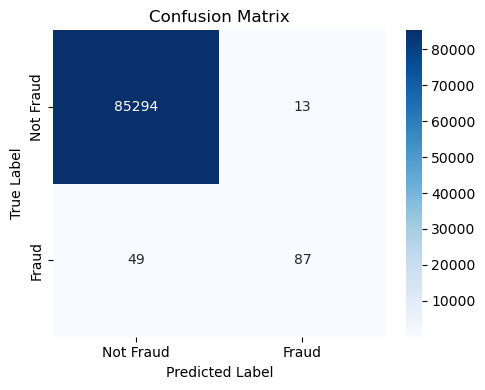

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


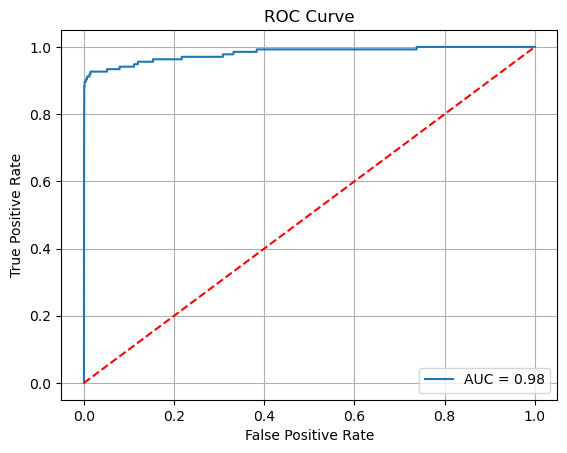

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

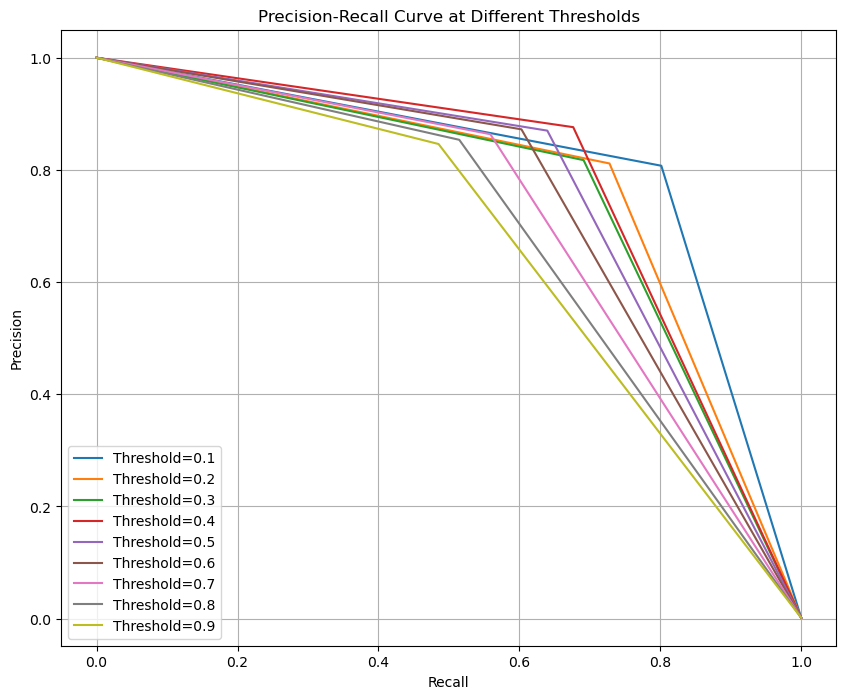

In [17]:
# Precision-Recall Curve with thresholds
thresholds = [0.1 * i for i in range(1, 10)]
plt.figure(figsize=(10, 8))

for t in thresholds:
    y_thresh = (y_proba >= t).astype(int)
    precision, recall, _ = precision_recall_curve(y_test, y_thresh)
    plt.plot(recall, precision, label=f'Threshold={t:.1f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()